In [4]:
# install.packages(c("ggplot2", "ggpubr", "tidyverse", "broom", "AICcmodavg"))
# install.packages(c("formatR", "jsonlite"), repos="http://cran.rstudio.com")

In [5]:
library(readr)
library(dplyr)
library(ggplot2)
library(ggpubr)
library(broom)


Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggpubr' was built under R version 3.6.3"

In [6]:
data <- read_csv("stcp-Rdataset-Diet.csv")
data


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  Person = col_double(),
  gender = col_double(),
  Age = col_double(),
  Height = col_double(),
  pre.weight = col_double(),
  Diet = col_double(),
  weight6weeks = col_double()
)



Person,gender,Age,Height,pre.weight,Diet,weight6weeks
25,NA,41,171,60,2,60.0
26,NA,32,174,103,2,103.0
1,0,22,159,58,1,54.2
2,0,46,192,60,1,54.0
3,0,55,170,64,1,63.3
4,0,33,171,64,1,61.1
5,0,50,170,65,1,62.2
6,0,50,201,66,1,64.0
7,0,37,174,67,1,65.0
8,0,28,176,69,1,60.5


## add weight loss column

In [7]:
data <- data %>% 
  mutate(weight_loss = pre.weight - weight6weeks)
data

Person,gender,Age,Height,pre.weight,Diet,weight6weeks,weight_loss
25,NA,41,171,60,2,60.0,0.0
26,NA,32,174,103,2,103.0,0.0
1,0,22,159,58,1,54.2,3.8
2,0,46,192,60,1,54.0,6.0
3,0,55,170,64,1,63.3,0.7
4,0,33,171,64,1,61.1,2.9
5,0,50,170,65,1,62.2,2.8
6,0,50,201,66,1,64.0,2.0
7,0,37,174,67,1,65.0,2.0
8,0,28,176,69,1,60.5,8.5


## a)

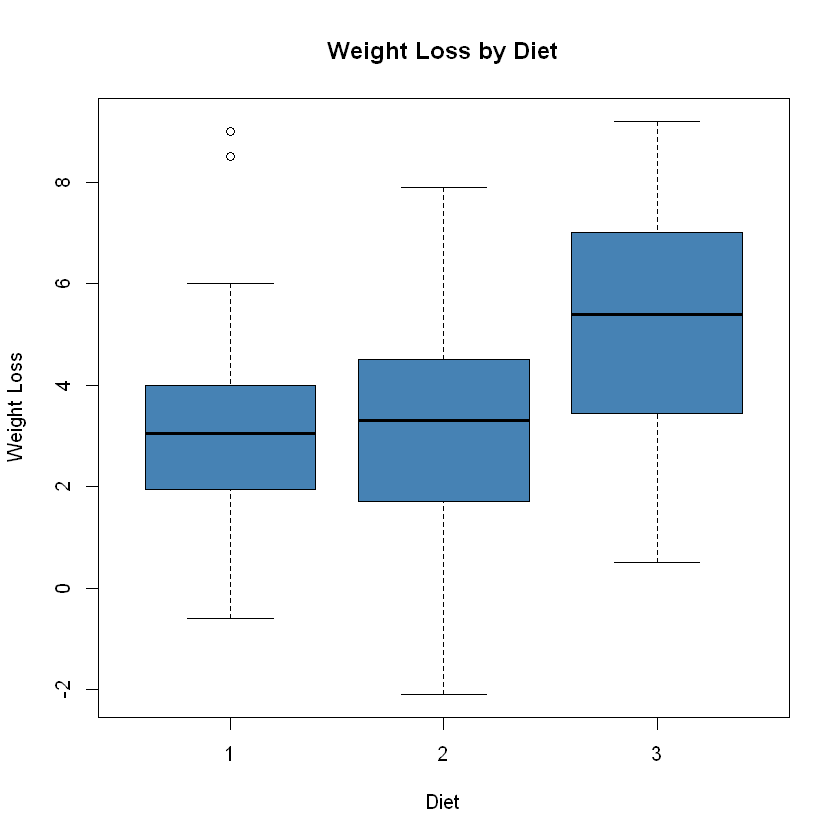

In [8]:
boxplot(data$weight_loss ~ data$Diet,
        col='steelblue',
        main='Weight Loss by Diet',
        xlab='Diet',
        ylab='Weight Loss') 

## b)

An **ANOVA test** is a way to find out if survey or experiment results are significant. In other words, they help you to figure out if you need to reject the null hypothesis or accept the alternate hypothesis.

Basically, you’re testing groups to see if there’s a difference between them

One-way or two-way refers to the number of independent variables (IVs) in your Analysis of Variance test.

- One-way has one independent variable (with 2 levels). For example: brand of cereal,
- Two-way has two independent variables (it can have multiple levels). For example: brand of cereal, calories

A one-way ANOVA is a type of statistical test that compares the variance in the group means within a sample whilst considering only one independent variable or factor. It is a hypothesis-based test, meaning that it aims to evaluate multiple mutually exclusive theories about our data. Before we can generate a hypothesis, we need to have a question about our data that we want an answer to.

A one-way ANOVA compares three or more than three categorical groups to establish whether there is a difference between them. Within each group there should be three or more observations (here, this means weight_loss), and the means of the samples are compared. 

**The Formula for ANOVA is:**

$$ F = \frac{MST}{MSE} $$

where:
+ F=ANOVA coefficient
+ MST=Mean sum of squares due to treatment
+ MSE=Mean sum of squares due to error


**What Does the Analysis of Variance Reveal?**

The ANOVA test is the initial step in analyzing factors that affect a given data set. Once the test is finished, an analyst performs additional testing on the methodical factors that measurably contribute to the data set's inconsistency. The analyst utilizes the ANOVA test results in an f-test to generate additional data that aligns with the proposed regression models.

The ANOVA test allows a comparison of more than two groups at the same time to determine whether a relationship exists between them. The result of the ANOVA formula, the F statistic (also called the F-ratio), allows for the analysis of multiple groups of data to determine the variability between samples and within samples.

If no real difference exists between the tested groups, which is called the null hypothesis, the result of the ANOVA's F-ratio statistic will be close to 1. The distribution of all possible values of the F statistic is the F-distribution. This is actually a group of distribution functions, with two characteristic numbers, called the numerator degrees of freedom and the denominator degrees of freedom.

### What are the hypotheses of a one-way ANOVA?

In a one-way ANOVA there are two possible hypotheses.

The null hypothesis (H0) is that there is no difference between the groups and equality between means (people loose same amount of weight in diffrent diets).
The alternative hypothesis (H1) is that there is a difference between the means and groups (people loose diffrent amount of weight in diffrent diets) .


### What are the assumptions and limitations of a one-way ANOVA?

- Normality – that each sample is taken from a normally distributed population
- Sample independence – that each sample has been drawn independently of the other samples
- Variance equality – that the variance of data in the different groups should be the same
- Your dependent variable – here, “weight”, should be continuous – that is, measured on a scale which can be subdivided  -- using increments (i.e. grams, milligrams)

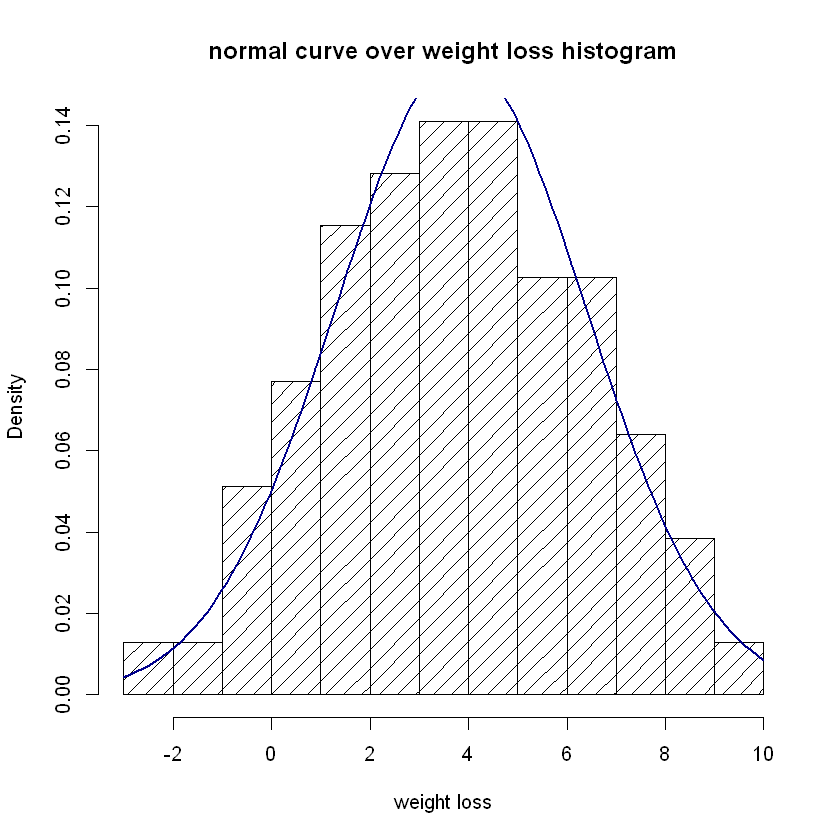

In [9]:
g = data$weight_loss
m<-mean(g)
std<-sqrt(var(g))
hist(g, density=10, breaks=10, prob=TRUE, 
     xlab="weight loss", 
     main="normal curve over weight loss histogram")
curve(dnorm(x, mean=m, sd=std), 
      col="darkblue", lwd=2, add=TRUE, yaxt="n")

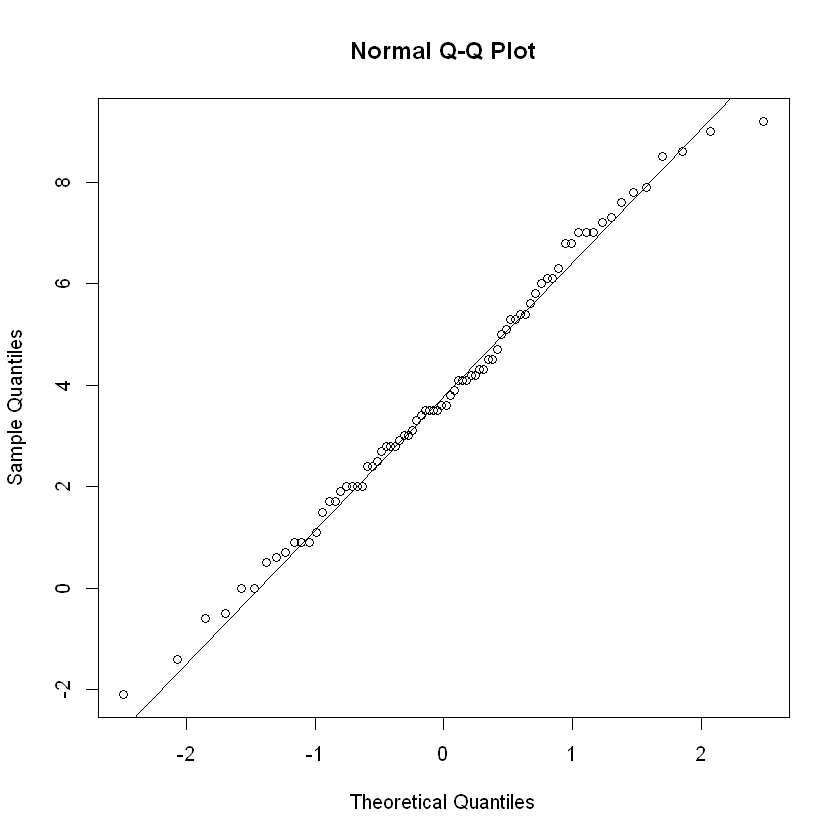

In [10]:
qqnorm(data$weight_loss)
qqline(data$weight_loss)

In [36]:
print('Variance of data in groups are shown in this table')
group_by(data, Diet) %>% 
      summarise(GroupVariance=var(rep(weight_loss)))

[1] "Variance of data in groups are shown in this table"


Diet,GroupVariance
1,5.018261
2,6.367379
3,5.738746



- as we can see in the graphs above, our data fits normal distribution
- in our tes each sample is independent from others so the 2nd assumption holds
- Regarding the variances of the groups above, we see that they are not equal and differ slightly
- The dependent variable or the weight in this case is of continuous type and the fourth condition is also established
    
It can be said about the assumptions of the problem:

- **$H_0$:** People on different diets lose the same amount of weight.

- **$H_a$:** People lose different amounts of weight on different diets.

In [35]:
Diet1 = data[data$Diet == 1,] %>% pull(weight_loss)
Diet2 = data[data$Diet == 2,] %>% pull(weight_loss)
Diet3 = data[data$Diet == 3,] %>% pull(weight_loss)
cat('# of diet1:', length(Diet1), '\n')
cat('# of diet2:', length(Diet2), '\n')
cat('# of diet3:', length(Diet3), '\n')

# of diet1: 24 
# of diet2: 27 
# of diet3: 27 


#### Step 1: Calculate the group means and the overall mean.

In [37]:
print('Mean of data in groups are shown in this table')
group_by(data, Diet) %>% 
      summarise(GroupMean=mean(rep(weight_loss)))

[1] "Mean of data in groups are shown in this table"


Diet,GroupMean
1,3.300000
2,3.025926
3,5.148148


In [38]:
overall_mean = mean(data$weight_loss)
cat('Overall Mean: ', overall_mean)

Overall Mean:  3.844872

#### Step 2: Calculate SSR. $ \longrightarrow n*\sum{(X_j - \bar{X})^2} $

- n: the sample size of group j
- Σ: a greek symbol that means “sum”
- Xj: the mean of group j
- X..: the overall mean

In [15]:
SSR = (27*(3.30 - overall_mean)^2) + (27*(3.025926 - overall_mean)^2) + (27*(5.148148 - overall_mean)^2)
SSR

[1] 71.98433

### Step 3: Calculate SSE.  $ \longrightarrow \sum{(X_{ij} - \bar{X})^2} $

- Σ: a greek symbol that means “sum”
- Xij: the ith observation in group j
- Xj: the mean of group j

In [16]:
SSE1 = 0
for (item in Diet1){
  SSE1 = SSE1 + (item - 3.30)^2
}
SSE1

[1] 115.42

In [17]:
SSE2 = 0
for (item in Diet2){
  SSE2 = SSE2 + (item - 3.025926)^2
}
SSE2

[1] 165.5519

In [18]:
SSE3 = 0
for (item in Diet3){
  SSE3 = SSE3 + (item - 5.148148)^2
}
SSE3

[1] 149.2074

In [19]:
SSE = SSE1 + SSE2 + SSE3
SSE 

[1] 430.1793

### Step 4: Calculate SST.  $ \longrightarrow SST = SSR + SSE $

In [20]:
SST = SSE + SSR
SST

[1] 502.1636

### Step 5: Fill in the ANOVA table.

- df treatment: k-1 
- df error: n-k 
- df total: n-1 
- MS treatment: SST / df treatment 
- MS error: SSE / df error 
- F: MS treatment / MS error 

**Note:** n = total observations, k = number of groups

In [21]:
tab <- matrix(nrow=3, ncol=4, byrow=TRUE)
colnames(tab) <- c('SS', 'df', 'MS', 'F')
rownames(tab) <- c('Treatment', 'Error', 'Total')
tab

,SS,df,MS,F
Treatment,NA,NA,NA,NA
Error,NA,NA,NA,NA
Total,NA,NA,NA,NA


In [22]:
tab[,1] = c(SSR, SSE, SST)
tab[, 2] = c(2, 76, 78)
tab[, 3] = c(SSR / 2, SSE / 76, NA)
tab[1, 4] = tab[1,3] / tab[2, 3]
tab

,SS,df,MS,F
Treatment,71.98433,2,35.992166,6.358755
Error,430.17926,76,5.660253,NA
Total,502.16359,78,NA,NA


### Step 6: Interpret the results.

The F test statistic for this one-way ANOVA is 6.358755. To determine if this is a statistically significant result, we must compare this to the F critical value found in the F distribution table with the following values:

- α (significance level) = 0.05
- DF1 (numerator degrees of freedom) = df treatment = 2
- DF2 (denominator degrees of freedom) = df error = 76

![f.05](img/f.05.png)

Since the F test statistic in the ANOVA table is more than the F critical value in the F distribution table, we **reject** the null hypothesis. This means we have sufficient evidence to say that there is a statistically significant difference between the mean weight loss of the three groups.


also we can use p-value to test the results: 

- A p-value is a statistical measurement used to validate a hypothesis against observed data.

- A p-value measures the probability of obtaining the observed results, assuming that the null hypothesis is true.
The lower the p-value, the greater the statistical significance of the observed difference.

- A p-value of 0.05 or lower is generally considered statistically significant.
P-value can serve as an alternative to or in addition to preselected confidence levels for hypothesis testing.

for gettin the p_value for this test we use F distribution table

![f](img/f.png)


***The p-value is between 0.01 and 0.001. The result is significant at p < .05 .***

for making sure result is true we use R

In [43]:
p_ = 1 - pf( 6.358755, 2, 76)
p_

[1] 0.002796156

## c)

In [23]:
one.way <- aov(weight_loss ~ factor(Diet), data = data)

**Notice:** check the ANOVA assumptions using R

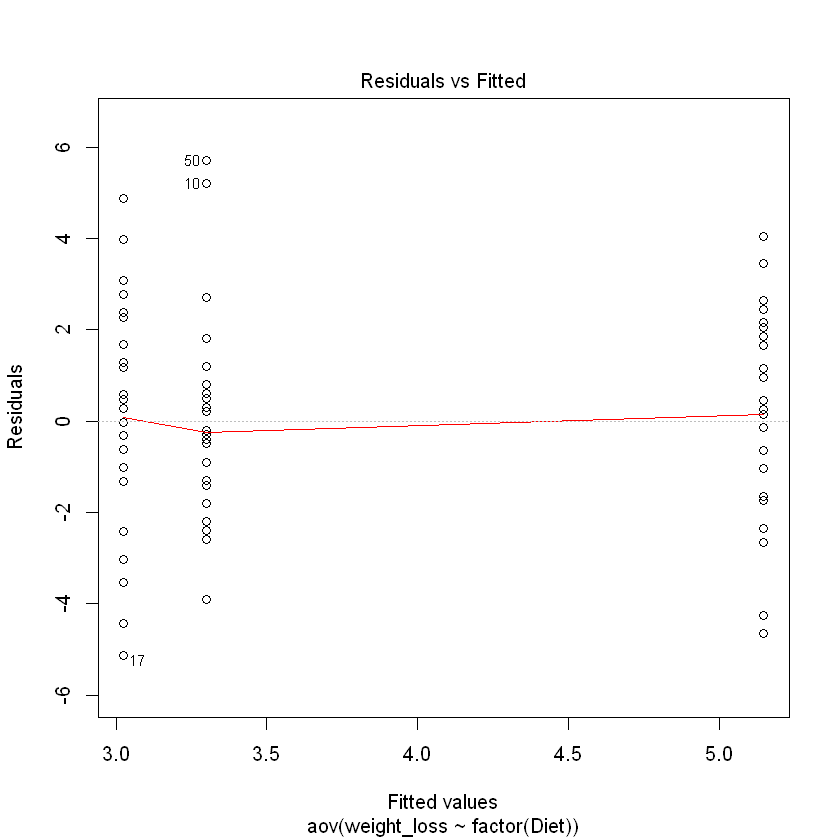

In [25]:
plot(one.way, 1)

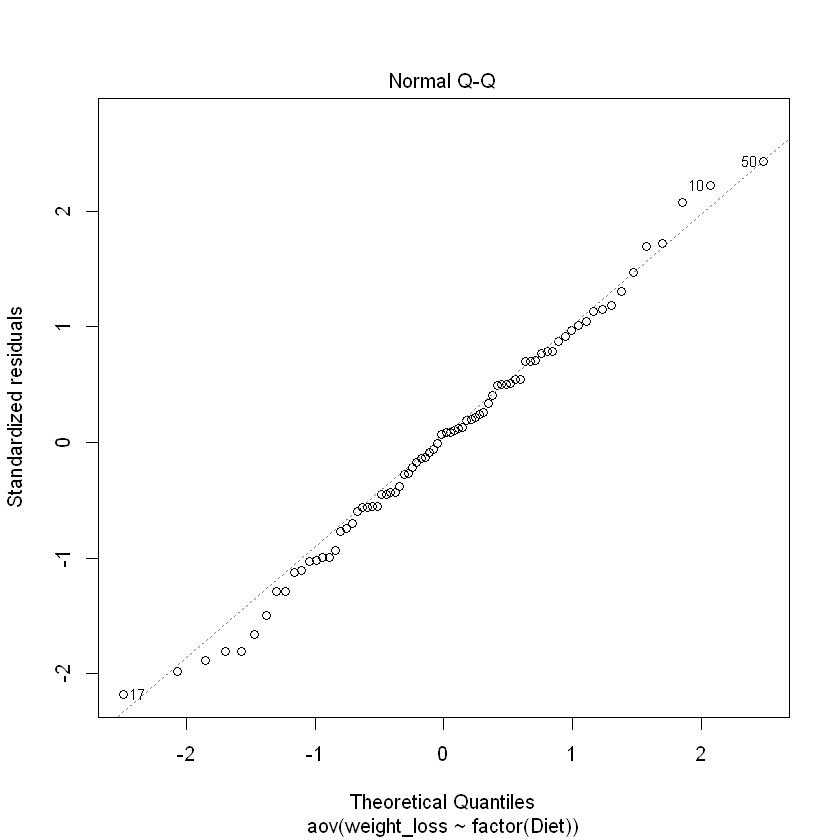

In [26]:
plot(one.way, 2)

In [24]:
summary(one.way)

             Df Sum Sq Mean Sq F value  Pr(>F)   
factor(Diet)  2   71.1   35.55   6.197 0.00323 **
Residuals    75  430.2    5.74                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

## d)

the model summary first lists the independent variables being tested in the model (in this case we have only one, ‘diet’) and the model residuals (‘Residual’). All of the variation that is not explained by the independent variables is called residual variance.

The rest of the values in the output table describe the independent variable and the residuals:

- The Df column displays the degrees of freedom for the independent variable (the number of levels in the variable minus 1), and the degrees of freedom for the residuals (the total number of observations minus one and minus the number of levels in the independent variables).
- The Sum Sq column displays the sum of squares (a.k.a. the total variation between the group means and the overall mean).
- The Mean Sq column is the mean of the sum of squares, calculated by dividing the sum of squares by the degrees of freedom for each parameter.
- The F-value column is the test statistic from the F test. This is the mean square of each independent variable divided by the mean square of the residuals. The larger the F value, the more likely it is that the variation caused by the independent variable is real and not due to chance.
- The Pr(>F) column is the p-value of the F-statistic. This shows how likely it is that the F-value calculated from the test would have occurred if the null hypothesis of no difference among group means were true.

**The p-value of the diet variable is lower than $\alpha$ (p.value < 0.05), so we can reject null hyppothesis and it appears that the type of diet used has a real impact on the final weight loss.**

<hr/>

## e)

A t-test is a type of inferential statistic used to determine if there is a significant difference between the means of two groups, which may be related in certain features. It is mostly used when the data sets, like the data set recorded as the outcome from flipping a coin 100 times, would follow a normal distribution and may have unknown variances. A t-test is used as a hypothesis testing tool, which allows testing of an assumption applicable to a population. 

A t-test looks at the t-statistic, the t-distribution values, and the degrees of freedom to determine the statistical significance. To conduct a test with three or more means, one must use an analysis of variance.

since we assumed variances of groups to be equal in ANOVA we're going to use t-test method for Independent samples with 2 equal but unknown variances.

This test is used only when it can be assumed that the two distributions have the same variance. (When this assumption is violated, see below.) The previous formulae are a special case of the formulae below, one recovers them when both samples are equal in size: n = n1 = n2.

The t statistic to test whether the means are different can be calculated as follows:


$ t = \frac{\bar{x_1} - \bar{x_2}}{s_p\sqrt{1/n_1 + 1/n_2}} $

where

$ s_p = \sqrt{\frac{(n_1 - 1) s_{X_1}^2 + (n_2 - 1) s_{X_2}^2}{n_1 + n_2 - 2}} $

is the pooled standard deviation of the two samples: it is defined in this way so that its square is an unbiased estimator of the common variance whether or not the population means are the same. In these formulae, ni − 1 is the number of degrees of freedom for each group, and the total sample size minus two (that is, n1 + n2 − 2) is the total number of degrees of freedom, which is used in significance testing.

$H_0: mu_1 = mu_2$

$H_1: mu_1 - mu_2 > 0$

$CriticalValue: t_{a, n_1+n_2-2} : [1.684 , 1.671]$


#### AB Test (df = 49)

In [27]:
s_p = sqrt(((24-1) * 5.01 + (27-1) * 6.36) / (24+27-2))
t_o = ((3.30 - 3.02) - (0)) / (s_p * sqrt((1/24)+(1/27)))
t_o

[1] 0.4170829

#### BC Test (df =52)

In [28]:
s_p = sqrt(((27-1) * 6.36 + (27-1) * 5.73) / (27+27-2))
t_o = ((3.02 - 5.14) - (0)) / (s_p * sqrt((1/27)+(1/27)))
t_o

[1] -3.168142

#### AC Test (df = 49)

In [29]:
s_p = sqrt(((24-1) * 5.01 + (27-1) * 5.73) / (24+27-2))
t_o = ((3.30 - 5.14) - (0)) / (s_p * sqrt((1/24)+(1/27)))
t_o

[1] -2.824513

Next part we use the T-table and find values

**We can see that Diet 3 is working better than 1 & 2. but on the other hand Diet 1 & 2 are the same.**

## f)

In [30]:
t.test(Diet1, Diet2)


	Welch Two Sample t-test

data:  Diet1 and Diet2
t = 0.41089, df = 49, p-value = 0.6829
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.066364  1.614512
sample estimates:
mean of x mean of y 
 3.300000  3.025926 


In [31]:
t.test(Diet2, Diet3)


	Welch Two Sample t-test

data:  Diet2 and Diet3
t = -3.1693, df = 51.86, p-value = 0.002563
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.465975 -0.778469
sample estimates:
mean of x mean of y 
 3.025926  5.148148 


In [32]:
t.test(Diet1, Diet3)


	Welch Two Sample t-test

data:  Diet1 and Diet3
t = -2.8462, df = 48.862, p-value = 0.00645
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.1531357 -0.5431606
sample estimates:
mean of x mean of y 
 3.300000  5.148148 


**The findings of this section confirm the statements of the previous section**